In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("CustomerPurchaseData.csv")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,387,1976,Basic,Married,7500.0,0,0,13/11/12,59,6,...,8,0,0,0,0,0,0,3,11,0.0
1,8373,1979,Basic,Together,24594.0,1,0,10/12/13,94,1,...,5,0,0,0,0,0,0,3,11,0.0
2,5342,1976,Basic,Divorced,9548.0,1,0,08/08/12,31,0,...,8,0,0,0,0,0,0,3,11,0.0
3,2563,1961,Basic,Married,28249.0,0,0,15/06/14,80,1,...,6,0,0,0,0,0,0,3,11,0.0
4,9733,1978,Basic,Together,24882.0,1,0,09/09/12,52,1,...,6,1,0,0,0,0,0,3,11,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2238 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntSnacksProds       2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   i

In [4]:
data.shape

(2239, 29)

Checking For the Null Values

In [5]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  1
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntSnacksProds          0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response               23
dtype: int64

Income has only 1 Non Null Value So will impute the Same with zero

In [6]:
data['Income']=data['Income'].fillna(0)

In [7]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntSnacksProds          0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response               23
dtype: int64

dropping the Z_CostContact and Z_Revenue column

In [8]:
data.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [9]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntSnacksProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

Imputing the Response Columns

In [10]:
df=data[data.Response.isnull()]

In [11]:
df['Response']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

In [12]:
df['Response']=df["Response"].apply(lambda X : 1 if X>0 else 0)

In [13]:
df["Response"]

70      0
78      0
85      0
105     0
124     0
213     1
218     1
748     0
1101    0
1103    0
1197    0
1405    0
1515    0
1517    0
1518    1
1562    0
1567    0
1574    0
1856    0
2010    0
2040    0
2163    0
2238    1
Name: Response, dtype: int64

In [14]:
data=data.dropna()

In [15]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,387,1976,Basic,Married,7500.0,0,0,13/11/12,59,6,...,0,3,8,0,0,0,0,0,0,0.0
1,8373,1979,Basic,Together,24594.0,1,0,10/12/13,94,1,...,0,3,5,0,0,0,0,0,0,0.0
2,5342,1976,Basic,Divorced,9548.0,1,0,08/08/12,31,0,...,0,3,8,0,0,0,0,0,0,0.0
3,2563,1961,Basic,Married,28249.0,0,0,15/06/14,80,1,...,0,3,6,0,0,0,0,0,0,0.0
4,9733,1978,Basic,Together,24882.0,1,0,09/09/12,52,1,...,1,2,6,1,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,8207,1957,Cycle,Married,53233.0,0,1,18/03/14,18,28,...,0,3,4,0,0,0,0,0,0,0.0
2234,8722,1957,Cycle,Married,82347.0,0,0,06/11/12,38,556,...,7,10,3,1,0,0,1,0,0,1.0
2235,607,1955,Cycle,Divorced,41769.0,0,1,13/02/13,31,302,...,1,7,8,0,0,0,0,0,0,0.0
2236,3661,1995,Cycle,Single,80617.0,0,0,12/10/12,42,594,...,6,8,2,0,0,0,0,0,0,0.0


In [16]:
data_1=pd.concat([data,df],axis=0)

In [17]:
data_1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,387,1976,Basic,Married,7500.0,0,0,13/11/12,59,6,...,0,3,8,0,0,0,0,0,0,0.0
1,8373,1979,Basic,Together,24594.0,1,0,10/12/13,94,1,...,0,3,5,0,0,0,0,0,0,0.0
2,5342,1976,Basic,Divorced,9548.0,1,0,08/08/12,31,0,...,0,3,8,0,0,0,0,0,0,0.0
3,2563,1961,Basic,Married,28249.0,0,0,15/06/14,80,1,...,0,3,6,0,0,0,0,0,0,0.0
4,9733,1978,Basic,Together,24882.0,1,0,09/09/12,52,1,...,1,2,6,1,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,3769,1972,PhD,Together,1.0,0,0,02/03/14,17,25,...,0,3,7,0,0,0,0,0,0,0.0
2010,45276,1981,PhD,Single,1.0,0,0,31/05/13,82,23,...,0,3,6,0,0,0,0,0,0,0.0
2040,47279,1973,Cycle,Married,1.0,0,0,14/09/12,25,25,...,0,3,8,0,0,0,0,0,0,0.0
2163,4345,1964,Cycle,Single,1.0,1,0,12/01/14,49,5,...,0,2,7,0,0,0,0,0,0,0.0


In [18]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2239 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntSnacksProds       2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   i

In [19]:
data_1['Response']=data_1.Response.astype(int)

In [20]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2239 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntSnacksProds       2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   i

# EDA

<AxesSubplot:>

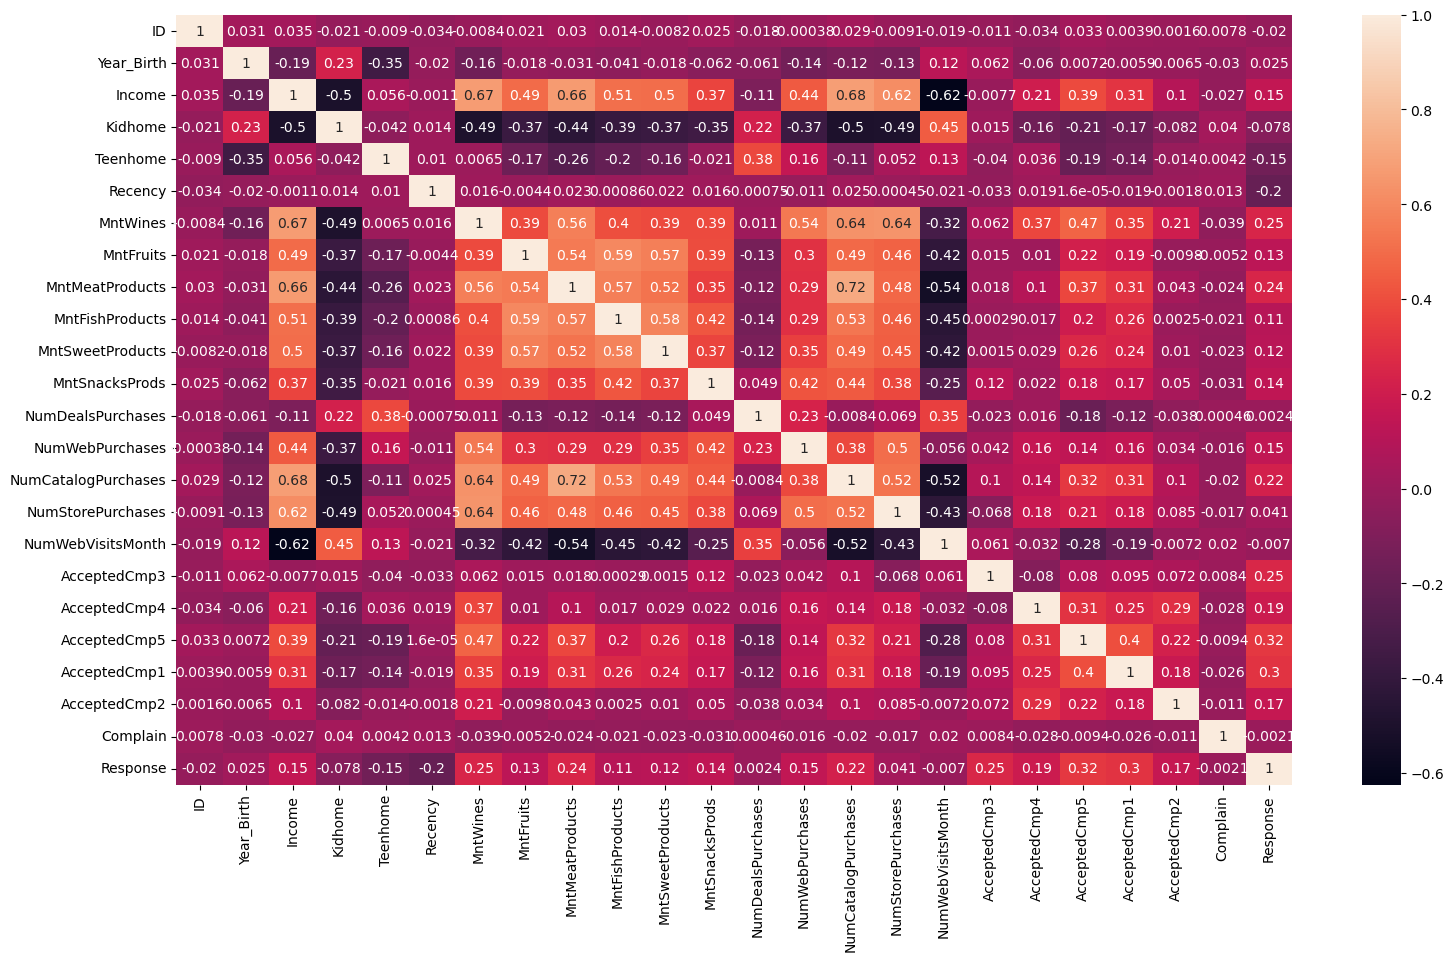

In [21]:
plt.figure(figsize=(18,10))
sns.heatmap(data_1.corr(),annot=True)

In [22]:
data_1.Kidhome.value_counts()

0    1293
1     899
2      47
Name: Kidhome, dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='NumCatalogPurchases'>

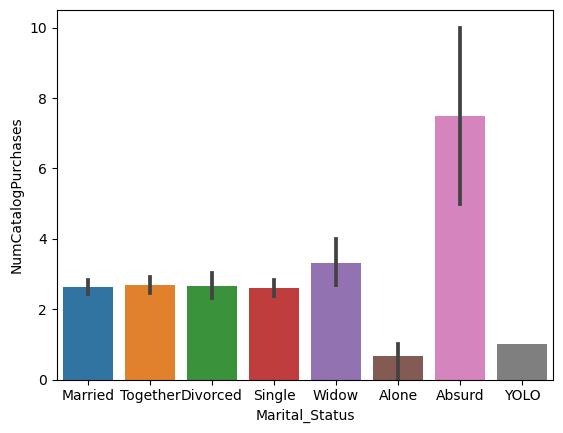

In [23]:
sns.barplot(x=data_1.Marital_Status,y=data_1.NumCatalogPurchases)

<AxesSubplot:xlabel='Income', ylabel='MntWines'>

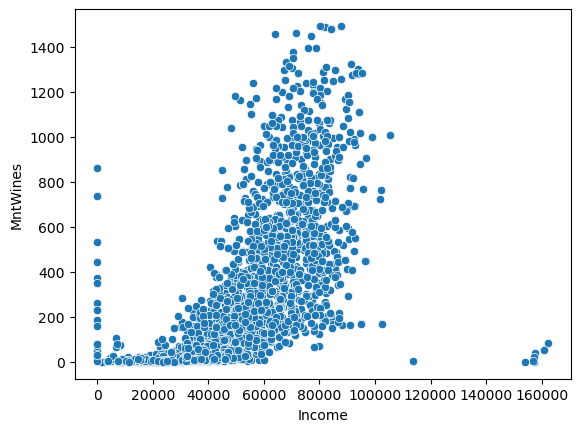

In [24]:
sns.scatterplot(y=data_1.MntWines,x=data_1.Income)

Amount Spent on Wines is increasing with Income from Income group 20000 to 100000. There are outliers which need to be removed for further analysis.

<AxesSubplot:xlabel='Income', ylabel='NumCatalogPurchases'>

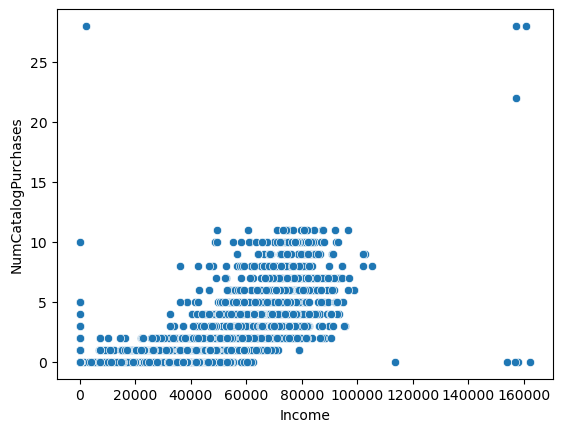

In [25]:
sns.scatterplot(y=data_1.NumCatalogPurchases,x=data_1.Income)

Number of Catalog Purchases is increasing with Income from Income group 20000 to 100000. There are outliers which need to be removed for further analysis.

<AxesSubplot:xlabel='Kidhome', ylabel='NumWebVisitsMonth'>

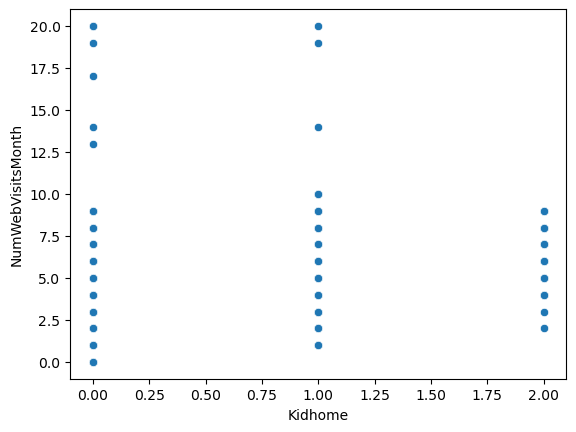

In [26]:
sns.scatterplot(x=data_1.Kidhome,y=data_1.NumWebVisitsMonth)

Number of WebVisits is more for people having 1 or 2 kids

# Feature Engineering

Creating Column for Customers who responded to Marketing Campaign or not

In [27]:
data_1['Response_Campaign']=data_1["AcceptedCmp1"]+data_1["AcceptedCmp2"]+data_1["AcceptedCmp3"]+data_1["AcceptedCmp4"]+data_1["AcceptedCmp5"]+data_1["Response"]

In [28]:
data_1["Response_Campaign"]=data_1["Response_Campaign"].apply(lambda x: 1 if x>0 else 0)

In [29]:
data_1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Response_Campaign
0,387,1976,Basic,Married,7500.0,0,0,13/11/12,59,6,...,3,8,0,0,0,0,0,0,0,0
1,8373,1979,Basic,Together,24594.0,1,0,10/12/13,94,1,...,3,5,0,0,0,0,0,0,0,0
2,5342,1976,Basic,Divorced,9548.0,1,0,08/08/12,31,0,...,3,8,0,0,0,0,0,0,0,0
3,2563,1961,Basic,Married,28249.0,0,0,15/06/14,80,1,...,3,6,0,0,0,0,0,0,0,0
4,9733,1978,Basic,Together,24882.0,1,0,09/09/12,52,1,...,2,6,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,3769,1972,PhD,Together,1.0,0,0,02/03/14,17,25,...,3,7,0,0,0,0,0,0,0,0
2010,45276,1981,PhD,Single,1.0,0,0,31/05/13,82,23,...,3,6,0,0,0,0,0,0,0,0
2040,47279,1973,Cycle,Married,1.0,0,0,14/09/12,25,25,...,3,8,0,0,0,0,0,0,0,0
2163,4345,1964,Cycle,Single,1.0,1,0,12/01/14,49,5,...,2,7,0,0,0,0,0,0,0,0


Removing Columns which are not required for the Analysis

In [30]:
data_2=data_1.copy()

In [31]:
data_2=data_2.drop(['Year_Birth',"Dt_Customer","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"],axis=1)

In [32]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2238
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Education            2239 non-null   object 
 2   Marital_Status       2239 non-null   object 
 3   Income               2239 non-null   float64
 4   Kidhome              2239 non-null   int64  
 5   Teenhome             2239 non-null   int64  
 6   Recency              2239 non-null   int64  
 7   MntWines             2239 non-null   int64  
 8   MntFruits            2239 non-null   int64  
 9   MntMeatProducts      2239 non-null   int64  
 10  MntFishProducts      2239 non-null   int64  
 11  MntSweetProducts     2239 non-null   int64  
 12  MntSnacksProds       2239 non-null   int64  
 13  NumDealsPurchases    2239 non-null   int64  
 14  NumWebPurchases      2239 non-null   int64  
 15  NumCatalogPurchases  2239 non-null   i

# Encoding Categorical Variables

We will use One Hot Encoding for the Encoding of Categorical Variable

In [33]:
dummy=pd.get_dummies(data_2[['Education','Marital_Status']],drop_first=True)
dummy

,Education_Cycle,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1856,0,0,0,1,0,0,0,0,1,0,0
2010,0,0,0,1,0,0,0,1,0,0,0
2040,1,0,0,0,0,0,1,0,0,0,0
2163,1,0,0,0,0,0,0,1,0,0,0


In [34]:
data_2=pd.concat([data_2,dummy],axis=1)
data_2

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,387,Basic,Married,7500.0,0,0,59,6,16,11,...,0,0,0,0,0,1,0,0,0,0
1,8373,Basic,Together,24594.0,1,0,94,1,3,6,...,0,0,0,0,0,0,0,1,0,0
2,5342,Basic,Divorced,9548.0,1,0,31,0,1,3,...,0,0,0,0,1,0,0,0,0,0
3,2563,Basic,Married,28249.0,0,0,80,1,9,7,...,0,0,0,0,0,1,0,0,0,0
4,9733,Basic,Together,24882.0,1,0,52,1,4,10,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,3769,PhD,Together,1.0,0,0,17,25,1,13,...,0,0,1,0,0,0,0,1,0,0
2010,45276,PhD,Single,1.0,0,0,82,23,0,15,...,0,0,1,0,0,0,1,0,0,0
2040,47279,Cycle,Married,1.0,0,0,25,25,3,43,...,0,0,0,0,0,1,0,0,0,0
2163,4345,Cycle,Single,1.0,1,0,49,5,1,9,...,0,0,0,0,0,0,1,0,0,0


In [35]:
data_2=data_2.drop(['Education',"Marital_Status"],axis=1)
data_2

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,387,7500.0,0,0,59,6,16,11,11,1,...,0,0,0,0,0,1,0,0,0,0
1,8373,24594.0,1,0,94,1,3,6,10,0,...,0,0,0,0,0,0,0,1,0,0
2,5342,9548.0,1,0,31,0,1,3,10,6,...,0,0,0,0,1,0,0,0,0,0
3,2563,28249.0,0,0,80,1,9,7,2,14,...,0,0,0,0,0,1,0,0,0,0
4,9733,24882.0,1,0,52,1,4,10,29,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,3769,1.0,0,0,17,25,1,13,0,0,...,0,0,1,0,0,0,0,1,0,0
2010,45276,1.0,0,0,82,23,0,15,0,2,...,0,0,1,0,0,0,1,0,0,0
2040,47279,1.0,0,0,25,25,3,43,17,4,...,0,0,0,0,0,1,0,0,0,0
2163,4345,1.0,1,0,49,5,1,9,2,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
data_encoded=data_2.copy()


Column ID is not useful for modeling. So we will drop the ID Column.

In [37]:
data_encoded=data_encoded.drop('ID',axis=1)
data_encoded

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntSnacksProds,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,7500.0,0,0,59,6,16,11,11,1,16,...,0,0,0,0,0,1,0,0,0,0
1,24594.0,1,0,94,1,3,6,10,0,9,...,0,0,0,0,0,0,0,1,0,0
2,9548.0,1,0,31,0,1,3,10,6,9,...,0,0,0,0,1,0,0,0,0,0
3,28249.0,0,0,80,1,9,7,2,14,10,...,0,0,0,0,0,1,0,0,0,0
4,24882.0,1,0,52,1,4,10,29,0,36,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,1.0,0,0,17,25,1,13,0,0,3,...,0,0,1,0,0,0,0,1,0,0
2010,1.0,0,0,82,23,0,15,0,2,7,...,0,0,1,0,0,0,1,0,0,0
2040,1.0,0,0,25,25,3,43,17,4,17,...,0,0,0,0,0,1,0,0,0,0
2163,1.0,1,0,49,5,1,9,2,0,4,...,0,0,0,0,0,0,1,0,0,0


In [38]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2238
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2239 non-null   float64
 1   Kidhome                  2239 non-null   int64  
 2   Teenhome                 2239 non-null   int64  
 3   Recency                  2239 non-null   int64  
 4   MntWines                 2239 non-null   int64  
 5   MntFruits                2239 non-null   int64  
 6   MntMeatProducts          2239 non-null   int64  
 7   MntFishProducts          2239 non-null   int64  
 8   MntSweetProducts         2239 non-null   int64  
 9   MntSnacksProds           2239 non-null   int64  
 10  NumDealsPurchases        2239 non-null   int64  
 11  NumWebPurchases          2239 non-null   int64  
 12  NumCatalogPurchases      2239 non-null   int64  
 13  NumStorePurchases        2239 non-null   int64  
 14  NumWebVisitsMonth       

In [39]:
data_encoded.nunique()

Income                     1976
Kidhome                       3
Teenhome                      3
Recency                     100
MntWines                    776
MntFruits                   158
MntMeatProducts             558
MntFishProducts             182
MntSweetProducts            177
MntSnacksProds              213
NumDealsPurchases            15
NumWebPurchases              15
NumCatalogPurchases          14
NumStorePurchases            14
NumWebVisitsMonth            16
Complain                      2
Response_Campaign             2
Education_Cycle               2
Education_Graduation          2
Education_Master              2
Education_PhD                 2
Marital_Status_Alone          2
Marital_Status_Divorced       2
Marital_Status_Married        2
Marital_Status_Single         2
Marital_Status_Together       2
Marital_Status_Widow          2
Marital_Status_YOLO           2
dtype: int64

# Outliers Analysis

In [40]:
def count_outliers(df):
    outliers = {}
    for col in df.select_dtypes(include='number').columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + (1.5 * iqr)
        lower_bound = q1 - (1.5 * iqr)
        outliers[col] = round(((len(df[(df[col] > upper_bound) | (df[col] < lower_bound)])) / len(df) * 100), 2)
    return outliers

In [41]:
outliers_percent = count_outliers(data_encoded)
print(sorted(list(outliers_percent.values())))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09, 0.13, 0.18, 0.31, 0.36, 0.94, 1.03, 1.56, 3.44, 3.84, 7.82, 9.07, 9.25, 9.96, 10.14, 10.36, 11.08, 16.53, 21.44, 21.71]


We will Clip the Outliers for Clustering Algorithm to Work

In [42]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.75))
    return x

In [43]:
data_new = data_encoded.apply(lambda x : outlier_capping(x))
data_new.shape

(2239, 28)

Scaling of Dataframe for the Modeling 

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler()

In [46]:
data_new.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntSnacksProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response_Campaign', 'Education_Cycle',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')

In [47]:
data_new_scaled=scaler.fit_transform(data_new)
data_new_scaled.shape

(2239, 28)

In [48]:
data_new_scaled=pd.DataFrame(data_new_scaled)
data_new_scaled.columns=['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntSnacksProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response_Campaign', 'Education_Cycle',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO']
data_new_scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntSnacksProds,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-2.291938,-0.855355,-0.955864,0.525584,-1.093450,0.164171,-0.987391,-0.481741,-0.961585,-0.589972,...,-1.005823,0.0,0.0,0.0,0.0,1.261521,0.0,-0.590589,0.0,0.0
1,-1.339514,1.169105,-0.955864,1.129454,-1.117915,-0.811239,-1.041997,-0.531511,-1.036253,-0.927477,...,-1.005823,0.0,0.0,0.0,0.0,-0.792694,0.0,1.693225,0.0,0.0
2,-2.177830,1.169105,-0.955864,-0.601641,-1.122808,-0.961302,-1.074760,-0.531511,-0.588243,-0.927477,...,-1.005823,0.0,0.0,0.0,0.0,-0.792694,0.0,-0.590589,0.0,0.0
3,-1.135869,-0.855355,-0.955864,1.129454,-1.117915,-0.361050,-1.031076,-0.929672,0.009104,-0.879262,...,-1.005823,0.0,0.0,0.0,0.0,1.261521,0.0,-0.590589,0.0,0.0
4,-1.323467,1.169105,-0.955864,0.243778,-1.117915,-0.736207,-0.998312,0.414121,-1.036253,0.374329,...,-1.005823,0.0,0.0,0.0,0.0,-0.792694,0.0,1.693225,0.0,0.0


# Modeling

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Choosing Ideal Number of Clusters using Elbow Method

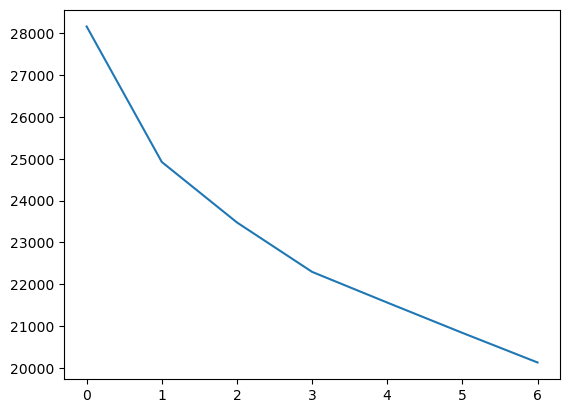

In [50]:
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(data_new_scaled)
    ssd.append(kmeans.inertia_)
plt.plot(ssd)

# Silhouette Analysis

In [51]:
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(data_new_scaled)
    cluster_labels=kmeans.labels_
    #silhouette score
    silhouette_avg=silhouette_score(data_new_scaled,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters,silhouette_avg))

For n_clusters=2, the silhouette score is 0.2964220168846451
For n_clusters=3, the silhouette score is 0.21883022699575094
For n_clusters=4, the silhouette score is 0.18270091118552712
For n_clusters=5, the silhouette score is 0.13834832936686065
For n_clusters=6, the silhouette score is 0.13228768972716684
For n_clusters=7, the silhouette score is 0.11164800763365193
For n_clusters=8, the silhouette score is 0.11625435583220677


In [52]:
# Final Model with K=3
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(data_new_scaled)

KMeans(max_iter=50, n_clusters=3)

In [53]:
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [54]:
# assign the label
data_2['cluster ID']=kmeans.labels_
data_2.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,cluster ID
0,387,7500.0,0,0,59,6,16,11,11,1,...,0,0,0,0,1,0,0,0,0,2
1,8373,24594.0,1,0,94,1,3,6,10,0,...,0,0,0,0,0,0,1,0,0,2
2,5342,9548.0,1,0,31,0,1,3,10,6,...,0,0,0,1,0,0,0,0,0,2
3,2563,28249.0,0,0,80,1,9,7,2,14,...,0,0,0,0,1,0,0,0,0,2
4,9733,24882.0,1,0,52,1,4,10,29,0,...,0,0,0,0,0,0,1,0,0,2


In [55]:
data_2['cluster ID'].value_counts()

2    968
1    674
0    597
Name: cluster ID, dtype: int64

In [56]:
# assign the label
data_1['cluster ID']=kmeans.labels_
data_1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Response_Campaign,cluster ID
0,387,1976,Basic,Married,7500.0,0,0,13/11/12,59,6,...,8,0,0,0,0,0,0,0,0,2
1,8373,1979,Basic,Together,24594.0,1,0,10/12/13,94,1,...,5,0,0,0,0,0,0,0,0,2
2,5342,1976,Basic,Divorced,9548.0,1,0,08/08/12,31,0,...,8,0,0,0,0,0,0,0,0,2
3,2563,1961,Basic,Married,28249.0,0,0,15/06/14,80,1,...,6,0,0,0,0,0,0,0,0,2
4,9733,1978,Basic,Together,24882.0,1,0,09/09/12,52,1,...,6,1,0,0,0,0,0,0,1,2


<AxesSubplot:xlabel='cluster ID', ylabel='Income'>

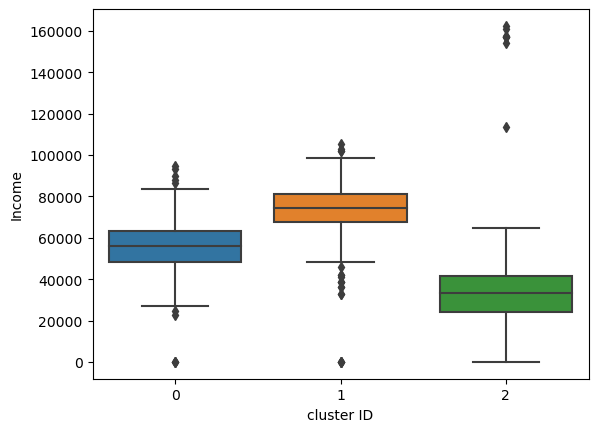

In [57]:
# plot
sns.boxplot(x='cluster ID',y='Income',data=data_1)

From Plot it is Clear that Cluster 0 is High Income Group followed by Cluster 1 and Cluster 2

<AxesSubplot:xlabel='cluster ID', ylabel='Recency'>

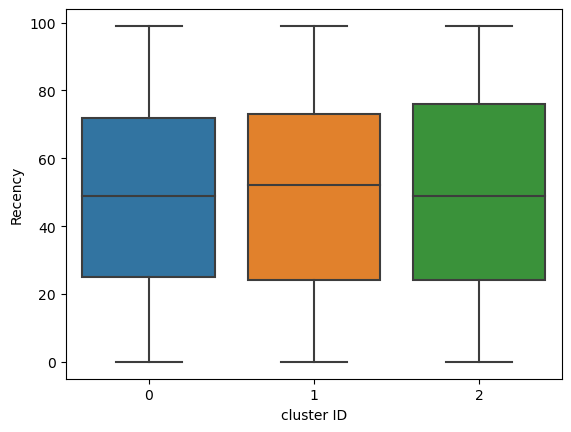

In [58]:
sns.boxplot(x='cluster ID',y='Recency',data=data_1)

Cluster 0 Customers have more recency compared to 1 and 2

<AxesSubplot:xlabel='cluster ID', ylabel='NumWebPurchases'>

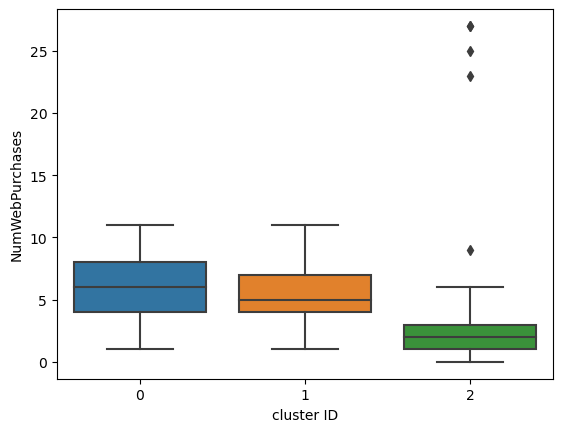

In [59]:

sns.boxplot(x='cluster ID',y='NumWebPurchases',data=data_1)

Cluster 1 people are making more number of Webpurchases

<AxesSubplot:xlabel='cluster ID', ylabel='NumWebVisitsMonth'>

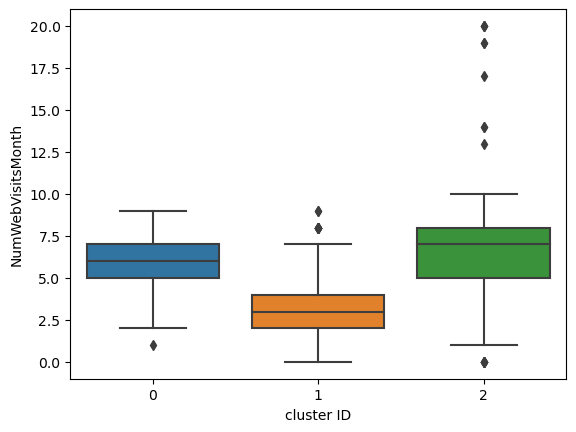

In [60]:

sns.boxplot(x='cluster ID',y='NumWebVisitsMonth',data=data_1)

Cluster 2 People are making most number of web visits but are purchasing least number of products from web

<AxesSubplot:xlabel='cluster ID', ylabel='NumStorePurchases'>

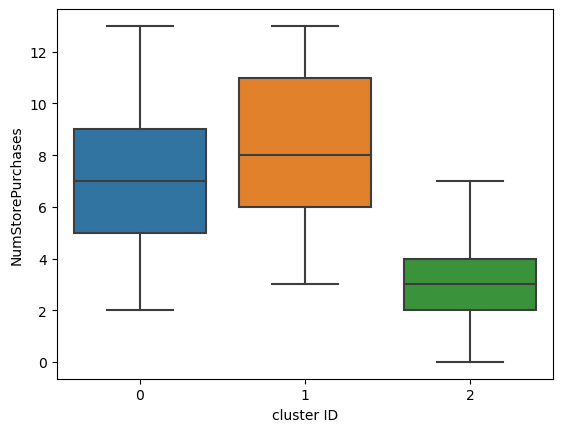

In [61]:

sns.boxplot(x='cluster ID',y='NumStorePurchases',data=data_1)

Cluster 0 people are making most number of store purchases followed by 1 and 2

<AxesSubplot:xlabel='cluster ID', ylabel='MntWines'>

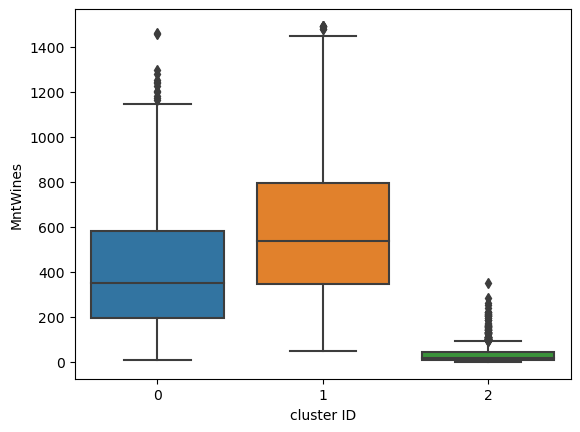

In [62]:

sns.boxplot(x='cluster ID',y='MntWines',data=data_1)

Cluster 0 people are spending most amount on wines

<AxesSubplot:xlabel='cluster ID', ylabel='MntFruits'>

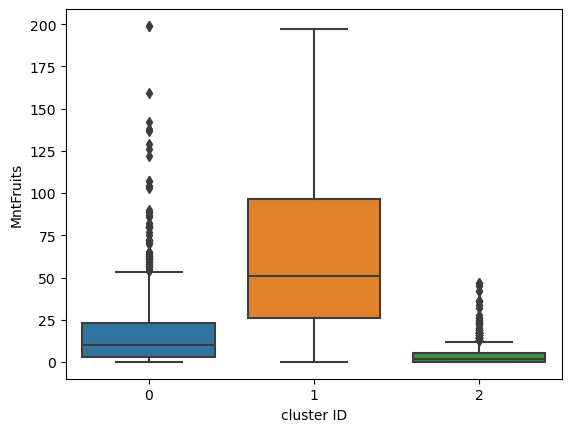

In [63]:

sns.boxplot(x='cluster ID',y='MntFruits',data=data_1)

<AxesSubplot:xlabel='cluster ID', ylabel='MntFishProducts'>

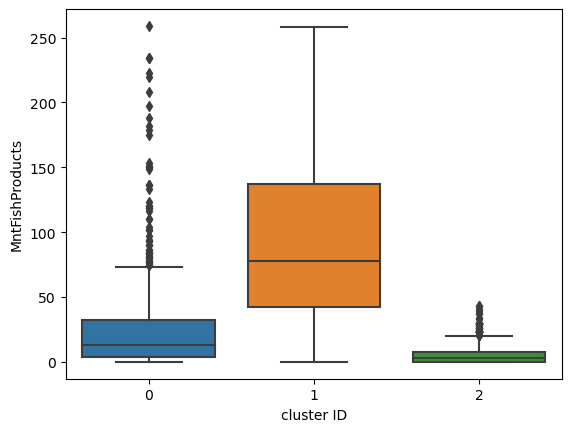

In [64]:


sns.boxplot(x='cluster ID',y='MntFishProducts',data=data_1)

<AxesSubplot:xlabel='cluster ID', ylabel='MntSweetProducts'>

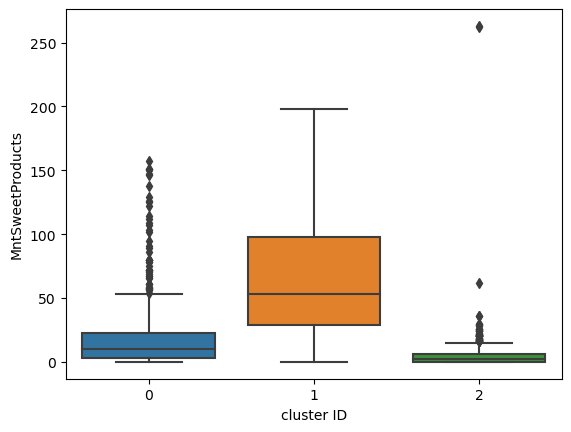

In [65]:

sns.boxplot(x='cluster ID',y='MntSweetProducts',data=data_1)

In [66]:

data_1['Total_amount_spent']=data_1['MntWines']+data_1['MntFruits']+data_1['MntMeatProducts']+data_1['MntFishProducts']+data_1['MntSweetProducts']+data_1['MntSnacksProds']

<AxesSubplot:xlabel='cluster ID', ylabel='Total_amount_spent'>

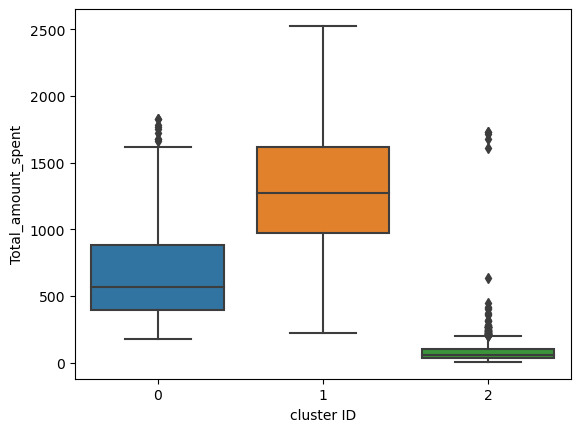

In [67]:
sns.boxplot(x='cluster ID',y='Total_amount_spent',data=data_1)

<AxesSubplot:xlabel='cluster ID', ylabel='Total_amount_spent'>

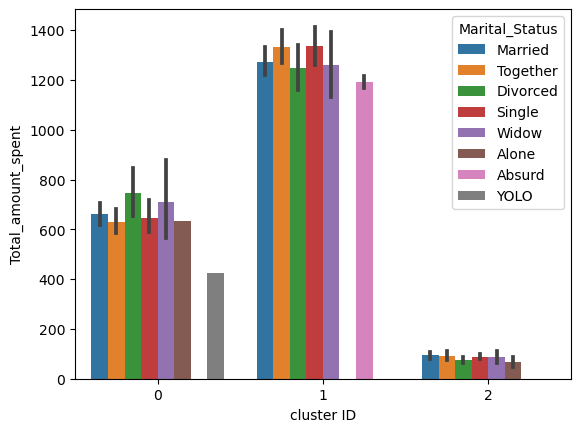

In [68]:
sns.barplot(x='cluster ID',y='Total_amount_spent',hue='Marital_Status',data=data_1)

<AxesSubplot:xlabel='cluster ID', ylabel='NumCatalogPurchases'>

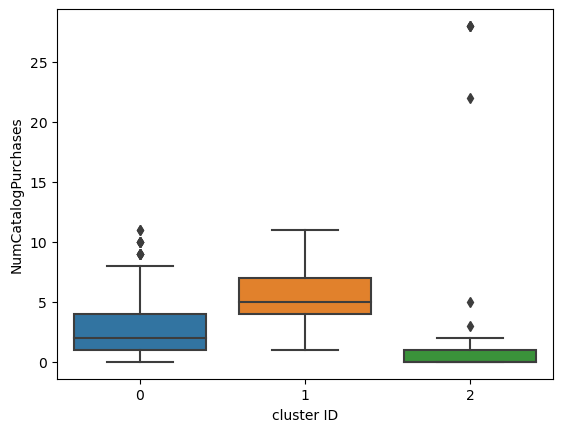

In [69]:

sns.boxplot(x='cluster ID',y='NumCatalogPurchases',data=data_1)

<AxesSubplot:xlabel='cluster ID', ylabel='NumDealsPurchases'>

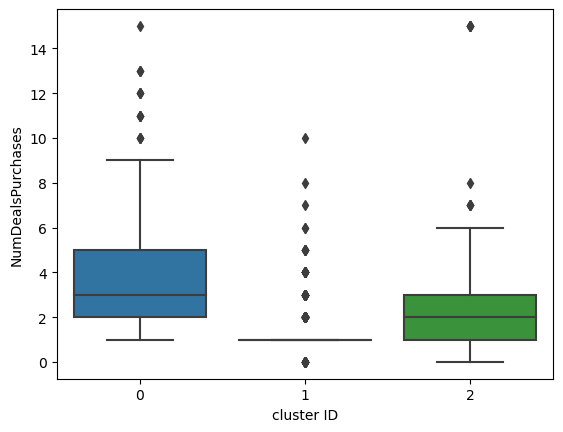

In [70]:

sns.boxplot(x='cluster ID',y='NumDealsPurchases',data=data_1)

Cluster 1 people have purchased most with discount followed by cluster 2 and cluster 0

<AxesSubplot:xlabel='cluster ID', ylabel='NumWebPurchases'>

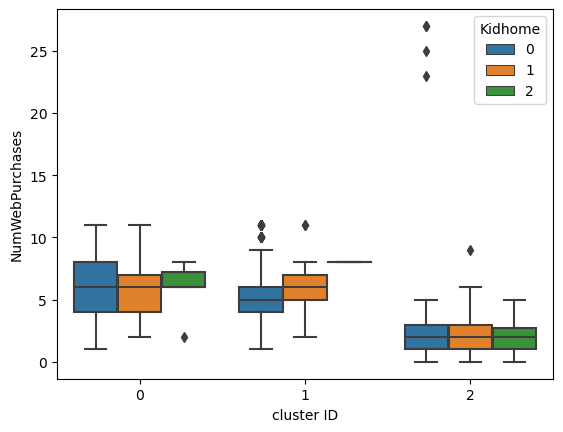

In [71]:
sns.boxplot(x='cluster ID',y='NumWebPurchases',data=data_1,hue='Kidhome')

People with kids are having most number of Web Purchases

<AxesSubplot:xlabel='cluster ID', ylabel='NumWebPurchases'>

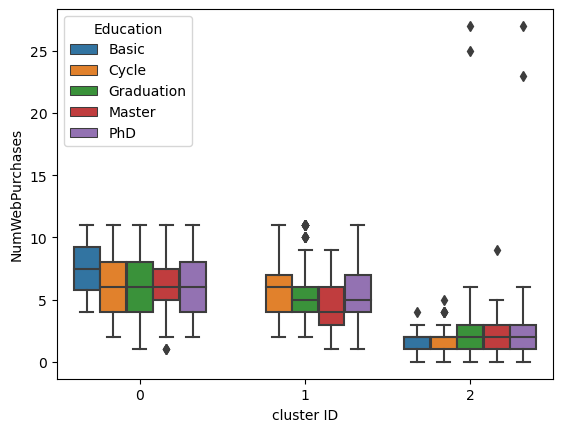

In [72]:
    
 sns.boxplot(x='cluster ID',y='NumWebPurchases',data=data_1,hue='Education')

Basic Education People in Cluster 1 are having most number of web Purchases

<AxesSubplot:xlabel='cluster ID', ylabel='NumWebPurchases'>

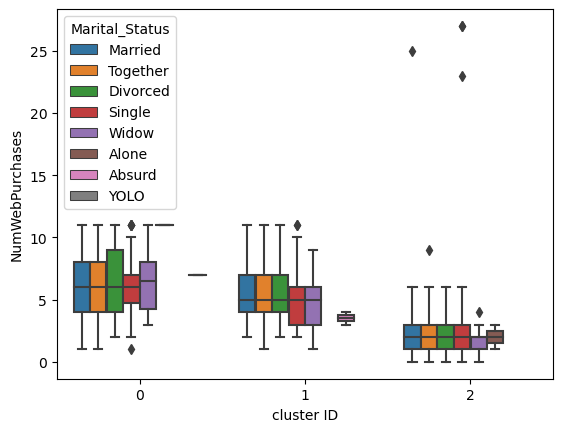

In [73]:
    
 sns.boxplot(x='cluster ID',y='NumWebPurchases',data=data_1,hue='Marital_Status')

<AxesSubplot:xlabel='Response_Campaign', ylabel='count'>

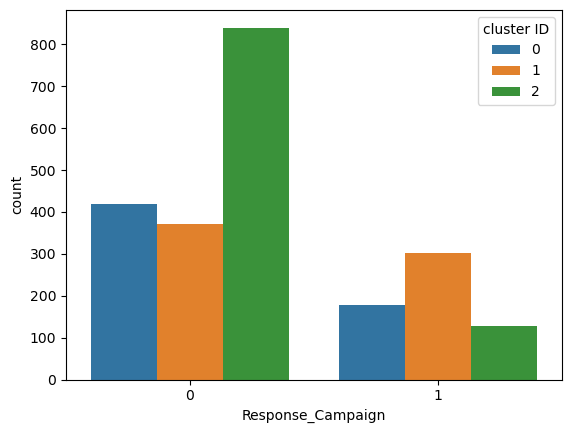

In [79]:
sns.countplot('Response_Campaign',data=data_1,hue='cluster ID')